In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [85]:
data = pd.read_csv("Advertising.csv", index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Tv simple Linear Regression

In [86]:
x = data.iloc[:,0].values #Tv data
#print(x)
y= data.iloc[:,3].values #sales

x= x.reshape(-1,1)
y= y.reshape(-1,1)

TypeError: 'str' object is not callable

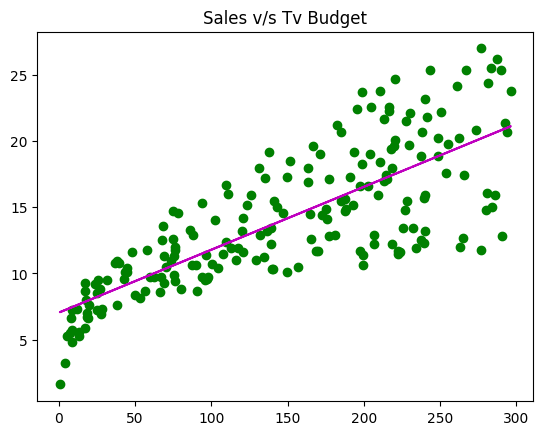

In [87]:
#create an empty linear regression model
tv_model = LinearRegression()

#to create the model, we use fit(x,y)
tv_model.fit(x,y)

y_pred = tv_model.predict(x)
plt.scatter(x,y,color = 'g')
plt.plot(x,tv_model.predict(x),color = 'm')
plt.title('Sales v/s Tv Budget')
plt.xlabel('Sales')
plt.ylabel('Tv Budget')
plt.show()


Radio simple Linear Regression

In [88]:
x = data.iloc[:,1].values #Radio data
#print(x)
y= data.iloc[:,3].values #sales

y= y.reshape(-1,1)
x= x.reshape(-1,1)

TypeError: 'str' object is not callable

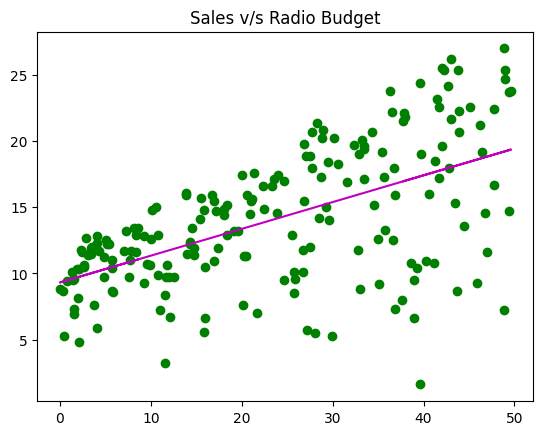

In [89]:
#create an empty linear regression model
radio_model = LinearRegression()

#to create the model, we use fit(x,y)
radio_model.fit(x,y)

y_pred = radio_model.predict(x)
plt.scatter(x,y,color = 'g')
plt.plot(x,radio_model.predict(x),color = 'm')
plt.title('Sales v/s Radio Budget')
plt.xlabel('Sales')
plt.ylabel('Radio Budget')
plt.show()


In [90]:
#the coefficient
print('Coefficients: \n', radio_model.coef_)

Coefficients: 
 [[0.20249578]]


Newspaper Simple Linear model

In [91]:
x = data.iloc[:,2].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

TypeError: 'str' object is not callable

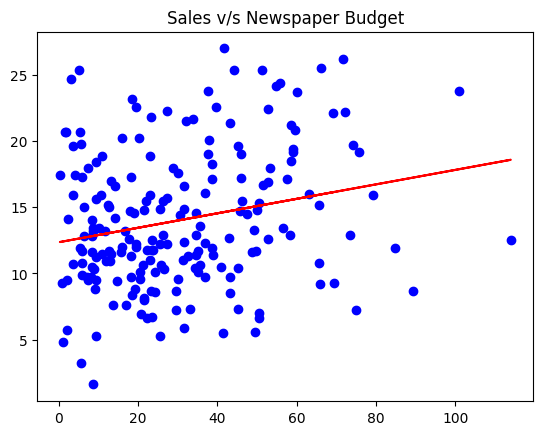

In [92]:
# create an empty linear regression model 
newspaper_model = LinearRegression()

# to create the model, we use fit(x,y)
newspaper_model.fit(x,y)

y_pred = newspaper_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,newspaper_model.predict(x),color = 'r')
plt.title('Sales v/s Newspaper Budget')
plt.xlabel('Sales')
plt.ylabel('Newspaper Budget')
plt.show()

In [93]:
# The coefficients
print('Coefficients: \n', newspaper_model.coef_)

Coefficients: 
 [[0.0546931]]


Multiple Linear Regression

In [94]:
X = data.iloc[:,[0,1,2]].values
X[1:4]

array([[ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5]])

In [95]:
y = data.iloc[:,3].values
y = y.reshape(-1, 1)
X = X.reshape(-1, 3)

# create an empty linear regression model like below and give it a good variable name
advertising_model = LinearRegression()

# to create the model, we use fit(x,y)
advertising_model.fit(X,y)


print('Intercept: \n', advertising_model.intercept_)
print('Coefficients: \n', advertising_model.coef_)

Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, shuffle = True)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


In [97]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [98]:
predictions[0:5]

array([[ 7.98650232],
       [21.24263026],
       [16.16033195],
       [16.45030518],
       [11.49153207]])

In [99]:
## Plot the errors
residuals = y_test-predictions
residuals = np.squeeze(residuals)

#ensure only +tive values are taken for yerr
res_absolute = np.abs(residuals)
res_absolute = np.squeeze(res_absolute)


<ErrorbarContainer object of 3 artists>

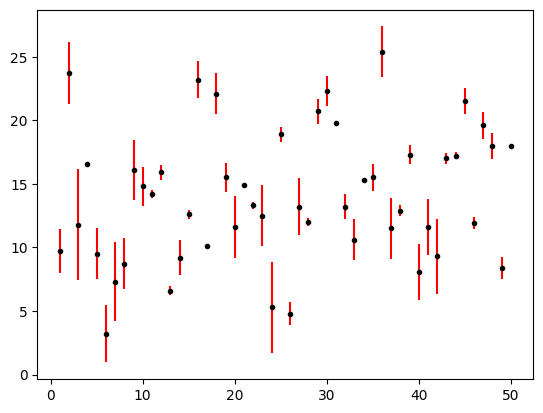

In [100]:
plt.errorbar(range(1,51), np.squeeze(y_test), yerr=res_absolute, fmt='.k', ecolor="red")

In [101]:
print ("Score:", model.score(X_test, y_test))

Score: 0.896664811887244
